# Tutorial 2

This script accompanies the Tutorial 2 presentation from class.  There are four examples of applying multiple linear regression and stepwise regression

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import itertools

In [2]:
#run stepwise regression function
%run ./Tutorial2_2019_functions.ipynb

## Example 1: Testing MLR on artificial data
Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4

In [3]:
#load X data and look at the first few rows
X = pd.read_csv('Xdata.csv',names=['X1','X2','X3','X4'])
X1 = X['X1']
X2 = X['X2']
X3 = X['X3']
X4 = X['X4']
X.head()

,X1,X2,X3,X4
0,50,61,49,94
1,96,27,34,88
2,35,66,91,56
3,59,69,37,63
4,23,75,12,59


In [4]:
#define regression coefficients, and calculate Y
a0 = 0
a1 = 1
a2 = -2
a3 = 3
a4 = -4

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4

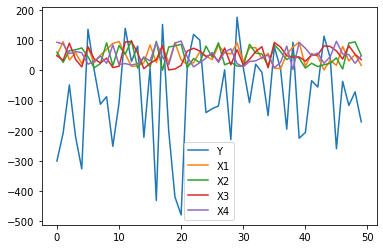

In [5]:
#plot X and Y
plt.subplot(111)
plt.plot(Y)
plt.plot(X)
plt.legend(['Y','X1','X2','X3','X4'])
plt.show()

In [6]:
#apply MLR on X and Y to see if this method can recover the known coefficients

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))



MLR results:
a0 = 1.1368683772161603e-13
a1 = 1.0000000000000002
a2 = -2.0000000000000027
a3 = 3.0
a4 = -4.0


In [7]:
#now, use stepwise regression to find which predictors to use

result = stepwise_selection(X, Y)

print('resulting features:')
print(result)

Add  X4                             with p-value 1.96607e-11
Add  X3                             with p-value 4.6339e-09
Add  X2                             with p-value 1.94203e-20
Add  X1                             with p-value 0.0
resulting features:
['X4', 'X3', 'X2', 'X1']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [8]:
#do MLR using predictors chosen from stepwise regression

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Y) #R-squared value from MLR model


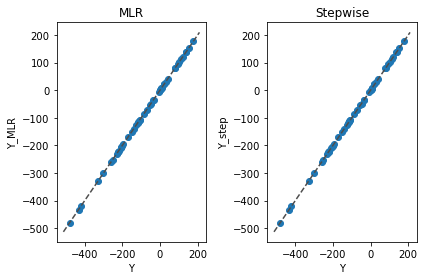

In [9]:
#visualize MLR and stepwise model performance

ax1 = plt.subplot(121)
ax1.scatter(Y,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Y')
plt.ylabel('Y_MLR')
plt.title('MLR')

ax2 = plt.subplot(122)
ax2.scatter(Y,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Y')
plt.ylabel('Y_step')
plt.title('Stepwise')

plt.tight_layout()
plt.show()

# Example 2
Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4 + Yrand

Add some random noise to Y and rerun MLR/stepwise

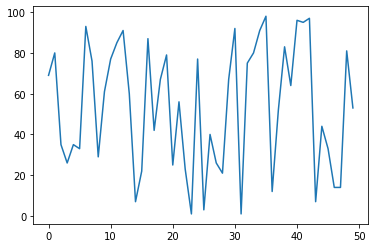

In [10]:
#load Yrand and check it out
Yrand = pd.read_csv('Yrand.csv',header=None)[0]
Ynew = Y + 5*Yrand

plt.plot(Yrand)
plt.show()

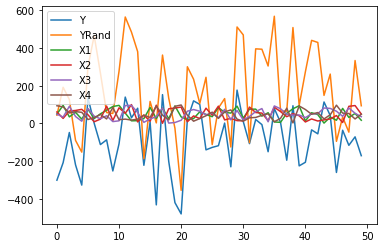

In [11]:
# plot Y, Ynew, and X

plt.subplot()
plt.plot(Y)
plt.plot(Ynew)
plt.plot(X)
plt.legend(['Y','YRand','X1','X2','X3','X4'])
plt.show()

In [12]:
#now: MLR

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))

MLR results:
a0 = 311.33892044632
a1 = 1.0297744038862915
a2 = -2.0570869420780595
a3 = 2.4549509246271173
a4 = -4.341338235550949


In [13]:
#now: stepwise, and then MLR with kept predictors

result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


Add  X4                             with p-value 8.3401e-06
Add  X2                             with p-value 0.0088294
Add  X3                             with p-value 0.0195409
resulting features:
['X4', 'X2', 'X3']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


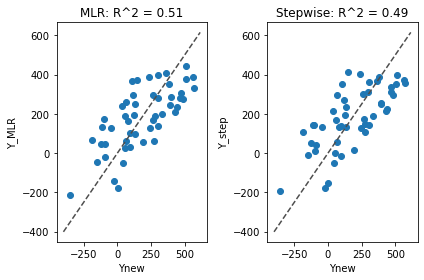

In [14]:

ax1 = plt.subplot(121)
ax1.scatter(Ynew,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:4])

ax2 = plt.subplot(122)
ax2.scatter(Ynew,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_step')
plt.title('Stepwise: R^2 = ' + str(R2_step)[:4])

plt.tight_layout()
plt.show()

option 2:
perfroming MLR with all combinations of predictors on one part of the data (calibration sample); use another part of the data (validation sample) for finding the best model according to R2 (or p-values). The best model = the one with smallest p-value over the validation sample

calibration sample: first 25 observations
validation sample: the rest

set arrey from 1 to the total number of predictors (i.e. 4)

In [15]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,5): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[:25,test_vars]
        Y_test = Ynew.iloc[:25]
        
        X_valid = X.iloc[25:,test_vars]
        Y_valid = Ynew.iloc[25:]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,Y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,Y_valid)) #R-squared value from MLR model

    R2_best.append(np.max(R2_test))
    combo_best.append(combinations[np.argmax(R2_test)])
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['X1', 'X2', 'X4']


In [16]:
#make linear model out of best predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,Ynew)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,Ynew) #R-squared value from MLR model



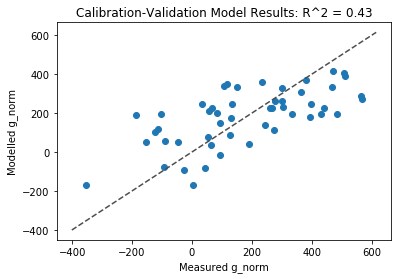

In [17]:
#visualize calibration-validation model performance

ax = plt.subplot(111)
ax.scatter(Ynew,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4])
plt.show()

## Example 3

Again, do MLR and stepwise, but with different coefficients

In [18]:
#new coefficients, new Y
a0 = 0
a1 = 4
a2 = -3
a3 = 2
a4 = -1

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4
Ynew = Y + 5*Yrand

In [19]:
#now: MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = 311.33892044632
a1 = 4.029774403886292
a2 = -3.0570869420780578
a3 = 1.4549509246271157
a4 = -1.3413382355509498

Stepwise results:
Add  X1                             with p-value 0.000431949
Add  X2                             with p-value 0.000336855
Add  X3                             with p-value 0.0455512
Resulting features:
['X1', 'X2', 'X3']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


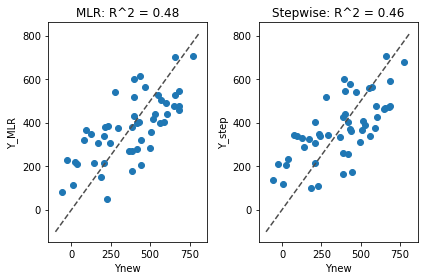

In [20]:
#visualize

ax1 = plt.subplot(121)
ax1.scatter(Ynew,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:4])

ax2 = plt.subplot(122)
ax2.scatter(Ynew,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_step')
plt.title('Stepwise: R^2 = ' + str(R2_step)[:4])

plt.tight_layout()
plt.show()

## Example 4

Scale up X4

In [21]:
X4new = 100 + 10*X4
X['X4'] = X4new

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4new
Ynew = Y + 5*Yrand

In [22]:
#MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = 314.7523028018298
a1 = 4.02977440388629
a2 = -3.0570869420780595
a3 = 1.4549509246271168
a4 = -1.0341338235550952

Stepwise results:
Add  X4                             with p-value 1.66666e-11
Add  X1                             with p-value 0.000236063
Add  X2                             with p-value 0.000179307
Resulting features:
['X4', 'X1', 'X2']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


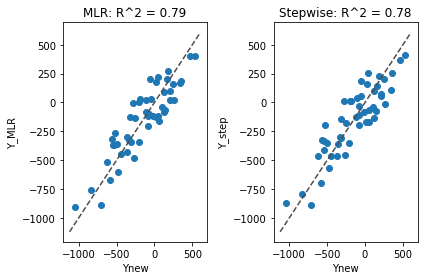

In [23]:
#visualize

ax1 = plt.subplot(121)
ax1.scatter(Ynew,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:4])

ax2 = plt.subplot(122)
ax2.scatter(Ynew,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_step')
plt.title('Stepwise: R^2 = ' + str(R2_step)[:4])

plt.tight_layout()
plt.show()

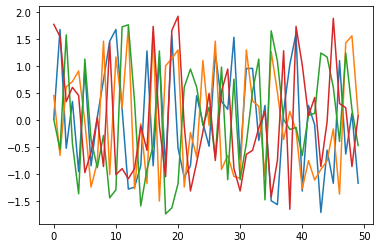

In [24]:
# standardize X and redo the analysis

Xnorm = (X - X.mean())/X.std()

plt.plot(Xnorm)
plt.show()

In [25]:
#MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(Xnorm,Ynew)
ypred_MLR = lm_MLR.predict(Xnorm) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(Xnorm,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(Xnorm, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(Xnorm[result],Ynew)
ypred_step = lm_step.predict(Xnorm[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(Xnorm[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = -148.32
a1 = 111.92565070869917
a2 = -94.02572830699535
a3 = 39.097444110673855
a4 = -275.18097649883447

Stepwise results:
Add  X4                             with p-value 1.66666e-11
Add  X1                             with p-value 0.000236063
Add  X2                             with p-value 0.000179307
Resulting features:
['X4', 'X1', 'X2']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


## Example 5: Real Data!

Use MLR and stepwise regression to predict crime rate from list of predictors

In [31]:
data = pd.read_csv('Crime_data.csv')
data.head()

,X1 = total overall reported crime rate per 1 million residents,"X2 = reported violent crime rate per 100,000 residents",X3 = annual police funding in $/resident,X4 = % of people 25 years+ with 4 yrs. of high school,X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.,X6 = % of 18 to 24 year-olds in college,X7 = % of people 25 years+ with at least 4 years of college
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [40]:
y = data[data.columns[1]] #predict: violent crime
X = data[data.columns[2:]] #predictors: rest of columns

In [42]:
#MLR, stepwise, and MLR with kept predictors: NOT STANDARDIZED

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, y,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model


MLR results:
a0 = 1171.2677140928297
a1 = 21.010321913237828
a2 = -23.91083258761783
a3 = -7.096893045462102
a4 = -6.5648075481888934

Stepwise results:
Add  X3 = annual police funding in $/resident with p-value 0.000158348
Add  X4 = % of people 25 years+ with 4 yrs. of high school with p-value 0.0450947
Resulting features:
['X3 = annual police funding in $/resident', 'X4 = % of people 25 years+ with 4 yrs. of high school']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [45]:
#normalize predictors so we can find out which is most important
Xnorm = (X - X.mean())/X.std()

In [46]:
#MLR, stepwise, and MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(Xnorm,y)
ypred_MLR = lm_MLR.predict(Xnorm) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(Xnorm,y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(Xnorm, y,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(Xnorm[result],y)
ypred_step = lm_step.predict(Xnorm[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(Xnorm[result],y) #R-squared value from MLR model


MLR results:
a0 = 616.18
a1 = 290.3702873908398
a2 = -238.27732233214218
a3 = -42.74999797540017
a4 = -97.16612181868595

Stepwise results:
Add  X3 = annual police funding in $/resident with p-value 0.000158348
Add  X4 = % of people 25 years+ with 4 yrs. of high school with p-value 0.0450947
Resulting features:
['X3 = annual police funding in $/resident', 'X4 = % of people 25 years+ with 4 yrs. of high school']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
